In [1]:
# https://github.com/scipy/scipy/issues/5998
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('iris.csv')

df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
df['labels'], df.uniques = pd.factorize(df['Species'])

df.uniques

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [5]:
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,labels
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0


In [6]:
df.min().to_frame()

,0
Unnamed: 0,1
Sepal.Length,4.3
Sepal.Width,2
Petal.Length,1
Petal.Width,0.1
Species,setosa
labels,0


In [7]:
df.max().to_frame()

,0
Unnamed: 0,150
Sepal.Length,7.9
Sepal.Width,4.4
Petal.Length,6.9
Petal.Width,2.5
Species,virginica
labels,2


In [8]:
df.mean().to_frame()

,0
Unnamed: 0,75.500000
Sepal.Length,5.843333
Sepal.Width,3.057333
Petal.Length,3.758000
Petal.Width,1.199333
labels,1.000000


In [9]:
from itertools import combinations

all_features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

list(combinations(all_features, 2))

[('Sepal.Length', 'Sepal.Width'),
 ('Sepal.Length', 'Petal.Length'),
 ('Sepal.Length', 'Petal.Width'),
 ('Sepal.Width', 'Petal.Length'),
 ('Sepal.Width', 'Petal.Width'),
 ('Petal.Length', 'Petal.Width')]

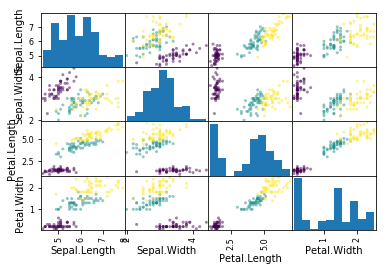

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[all_features], c=df['labels'])
plt.show()

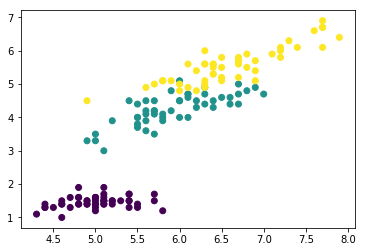

In [11]:
plt.scatter(df['Sepal.Length'], df['Petal.Length'], c=df['labels'])
plt.show()

In [12]:
def draw(x, y, clf):
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
    x1_step = (x1_max - x1_min) / 100

    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
    x2_step = (x1_max - x1_min) / 100

    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, x1_step),
                         np.arange(x2_min, x2_max, x2_step))
    z = clf.predict(np.stack((x1.ravel(), x2.ravel()), axis=-1))

    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())

    plt.contourf(x1, x2, z.reshape(x1.shape), alpha=0.1)
    plt.scatter(x[:, 0], x[:, 1], c=y)

    plt.show()

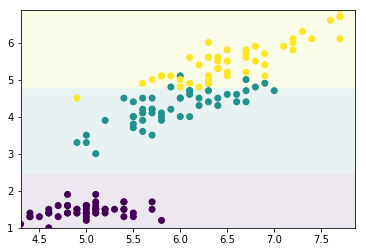

In [13]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

features = ['Sepal.Length', 'Petal.Length']

x = df[features].values
y = df['labels'].values

tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree.fit(x, y)

draw(x, y, tree)

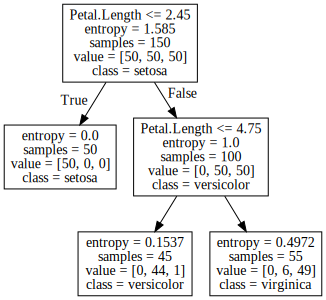

In [14]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    tree,
    feature_names=features,
    class_names=df.uniques.values,
    out_file=None
)

graphviz.Source(dot_data)

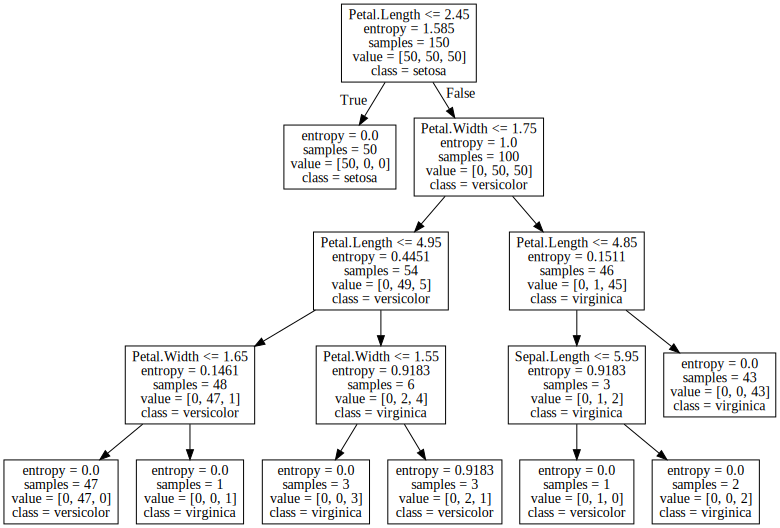

In [15]:
# Feature와 Depth 늘리기

x = df[all_features].values
y = df['labels'].values

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(x, y)

dot_data = export_graphviz(
    tree,
    feature_names=all_features,
    class_names=df.uniques.values,
    out_file=None
)
graphviz.Source(dot_data)

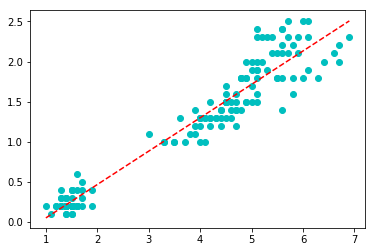

In [16]:
# Linear Regression

from sklearn.linear_model import LinearRegression

x = df[['Petal.Length']].values
y = df['Petal.Width'].values

regression = LinearRegression()
regression.fit(x, y)

z = regression.predict(x)

# plot

plt.scatter(x[:, 0], y, c='c')
plt.plot([x[:, 0].min(), x[:, 0].max()], [z.min(), z.max()], 'r--')
plt.show()

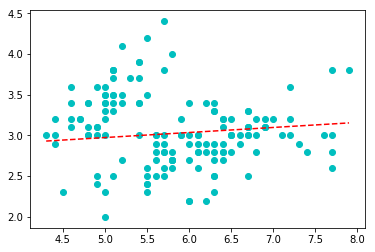

In [17]:
x = df[['Sepal.Length']].values
y = df['Sepal.Width'].values

regression = LinearRegression()
regression.fit(x, y)

z = regression.predict(x)

plt.scatter(x[:, 0], y, c='c')
plt.plot([x[:, 0].min(), x[:, 0].max()], [z.min(), z.max()], 'r--')
plt.show()

# -> 뭔가 이상한 경우

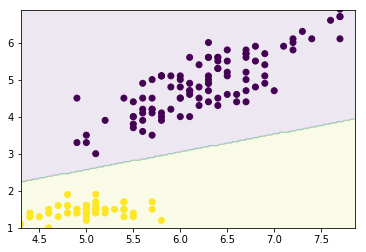

In [18]:
# Perceptron

from sklearn.linear_model import Perceptron

features = ['Sepal.Length', 'Petal.Length']

x = df[features].values
y = df['labels'] == 0

perceptron = Perceptron(random_state=1)
perceptron.fit(x, y)

draw(x, y, perceptron)

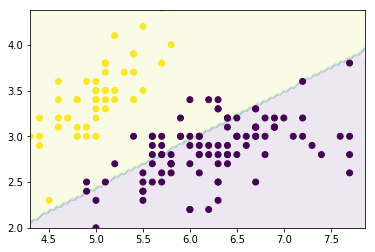

In [19]:
features = ['Sepal.Length', 'Sepal.Width']

x = df[features].values
y = df['labels'] == 0

perceptron = Perceptron(random_state=1)
perceptron.fit(x, y)

draw(x, y, perceptron)

# -> 뭔가 이상한 경우

In [20]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

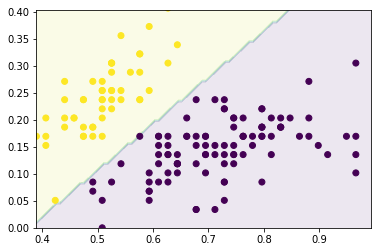

In [21]:
features = ['Sepal.Length', 'Sepal.Width']

x = normalize(df[features].values)
y = df['labels'] == 0

perceptron = Perceptron(random_state=1)
perceptron.fit(x, y)

draw(x, y, perceptron)

['Sepal.Length', 'Sepal.Width']


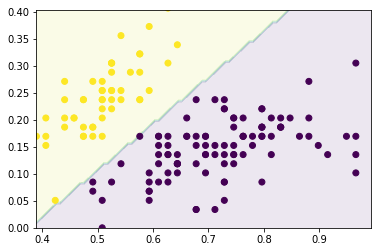

['Sepal.Length', 'Petal.Length']


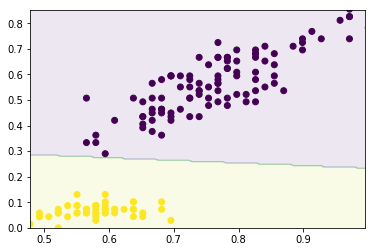

['Sepal.Length', 'Petal.Width']


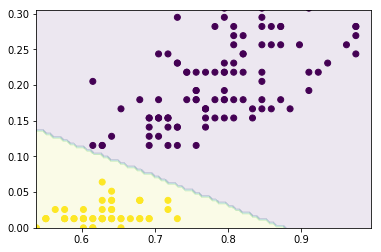

['Sepal.Width', 'Petal.Length']


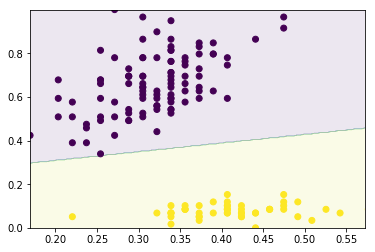

['Sepal.Width', 'Petal.Width']


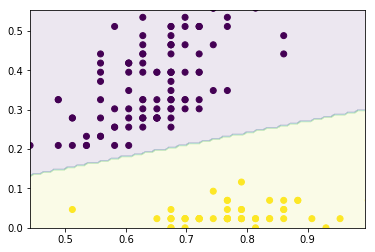

['Petal.Length', 'Petal.Width']


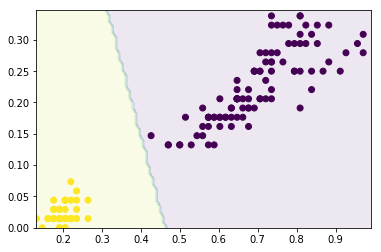

In [22]:
for features in [list(i) for i in combinations(all_features, 2)]:
    print(features)

    x = normalize(df[features].values)
    y = df['labels'] == 0

    perceptron = Perceptron(random_state=1)
    perceptron.fit(x, y)

    draw(x, y, perceptron)

['Sepal.Length', 'Sepal.Width']


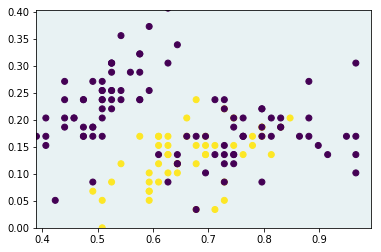

['Sepal.Length', 'Petal.Length']


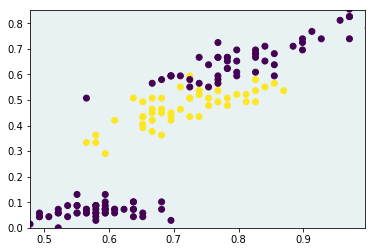

['Sepal.Length', 'Petal.Width']


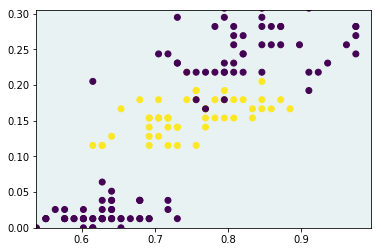

['Sepal.Width', 'Petal.Length']


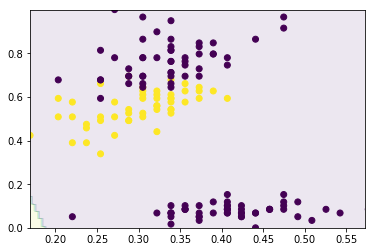

['Sepal.Width', 'Petal.Width']


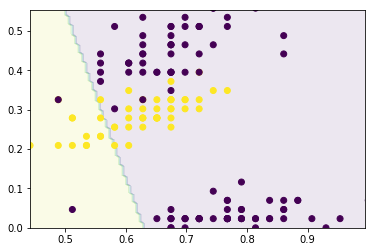

['Petal.Length', 'Petal.Width']


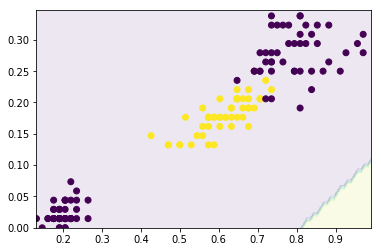

In [23]:
for features in [list(i) for i in combinations(all_features, 2)]:
    print(features)

    x = normalize(df[features].values)
    y = df['labels'] == 1

    perceptron = Perceptron(random_state=1)
    perceptron.fit(x, y)

    draw(x, y, perceptron)

# -> 뭔가 이상한 경우

['Sepal.Length', 'Sepal.Width']


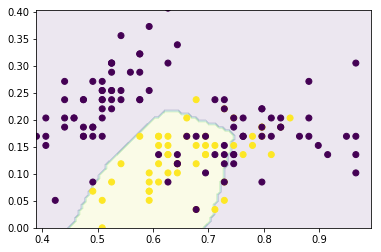

['Sepal.Length', 'Petal.Length']


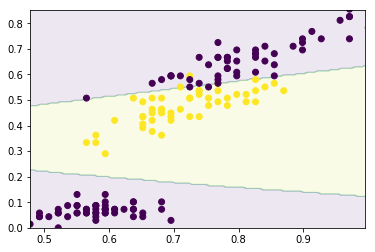

['Sepal.Length', 'Petal.Width']


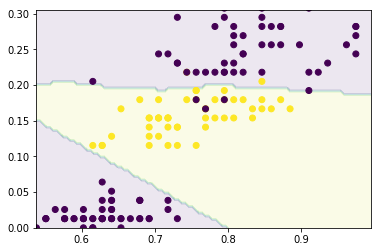

['Sepal.Width', 'Petal.Length']


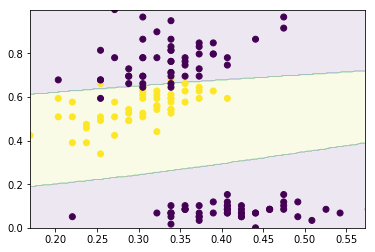

['Sepal.Width', 'Petal.Width']


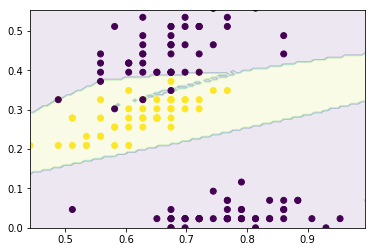

['Petal.Length', 'Petal.Width']


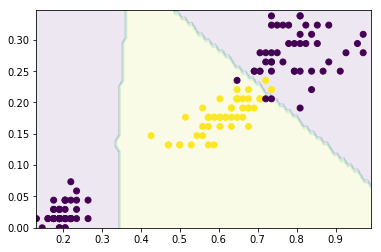

In [24]:
# Multi-layer Perceptron

from sklearn.neural_network import MLPClassifier

for features in [list(i) for i in combinations(all_features, 2)]:
    print(features)

    x = normalize(df[features].values)
    y = df['labels'] == 1

    # For small datasets, ‘lbfgs’ can converge faster and perform better.
    clf = MLPClassifier(hidden_layer_sizes=200, solver='lbfgs', random_state=1)
    clf.fit(x, y)

    draw(x, y, clf)

linear


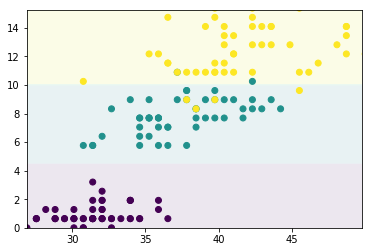

poly


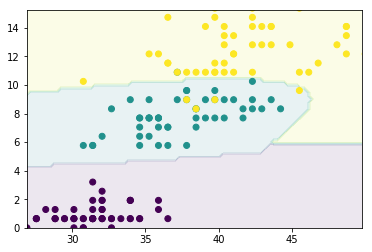

rbf


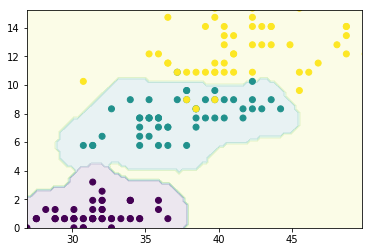

In [25]:
# SVM

from sklearn.svm import SVC

features = ['Sepal.Length', 'Petal.Width']

x = normalize(df[features].values) * 50
y = df['labels'].values

for kernel in ['linear', 'poly', 'rbf']:
    print(kernel)

    clf = SVC(kernel=kernel, random_state=1)
    clf.fit(x, y)

    draw(x, y, clf)